### TAREFA

**Ex1**: Analise e quantifique a relação da variável survived com a variável sex usando o conjunto de dados do titanic. Faça seus gráficos e calcule o chi-quadrado para quantificar a relação.

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [78]:
df = pd.read_csv("titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
round(df.Survived.value_counts()/df.Survived.shape[0],2)

0    0.62
1    0.38
Name: Survived, dtype: float64

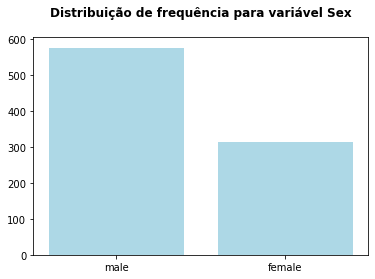

In [80]:
# Podemos ver isso graficamente também com um gráfico de barras

plt.bar(df.Sex.unique(), df.Sex.value_counts(), color = 'lightblue')
plt.title('Distribuição de frequência para variável Sex\n', {'fontsize': 12,'fontweight': 'bold'})
plt.show()

In [81]:
# A: sobreviver
# B: ser homem/mulher

prob_h = df[(df.Survived==1) & ( df.Sex=='male')].shape[0] / df[df.Sex=='male'].shape[0]
prob_m = df[(df.Survived==1) & ( df.Sex=='female')].shape[0] / df[df.Sex=='female'].shape[0]

print("Probabilidade de sobreviver sendo homem:", round(prob_h,2))
print("Probabilidade de sobreviver sendo mulher:", round(prob_m,2))

#É provável então que exista grande correlação entre ter sobrevevido e o sexo.

Probabilidade de sobreviver sendo homem: 0.19
Probabilidade de sobreviver sendo mulher: 0.74


In [83]:
df_Sex = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()

df_Sex

,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [84]:
Observado = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()).unstack()

Observado['total'] = Observado['total'] = Observado[[0]].values + Observado[[1]].values 

Observado

,0,1,total
Sex,,,
female,81,233,314
male,468,109,577


In [85]:
esp_0 = Observado.total.values * Survived.iloc[0].values
esp_1 = Observado.total.values * Survived.iloc[1].values

Esperado = pd.DataFrame(np.c_[esp_0,esp_1])

Esperado

,0,1
0,194.68,119.32
1,357.74,219.26


In [86]:
# Cálculo do chi-quadrado

# Observado menos o esperado: o_i - e_i == desvio
desvios = (Observado.iloc[:,:2].values - Esperado.values)
print(desvios)

#(o_i - e_i)^2
desvios_ao_quadrado = desvios**2

#(o_i - e_i)^2 / e_i

chi_quad = sum(sum(desvios_ao_quadrado/Esperado.values))

print("\nO chi-quadrado de Pearson é de:", chi_quad, "indicando uma 'boa' relação entre as variáveis!")

[[-113.68  113.68]
 [ 110.26 -110.26]]

O chi-quadrado de Pearson é de: 264.11838848422303 indicando uma 'boa' relação entre as variáveis!


In [87]:
print(Observado)
print('***********************')
print(Esperado)
print('***********************')
print(desvios)

          0    1  total
Sex                    
female   81  233    314
male    468  109    577
***********************
        0       1
0  194.68  119.32
1  357.74  219.26
***********************
[[-113.68  113.68]
 [ 110.26 -110.26]]


In [96]:
#(o_i - e_i)^2 / e_i
a = (-113.68)**2 / 194.68
b = (113.68)**2 / 119.32
c = (110.26)**2 / 357.74
d = (-110.26)**2/ 219.26

soma = a+b+c+d
print(soma)
print(chi_quad)

264.11838848422315
264.11838848422303


    
**Ex2**: 

OBS: Estude e rode o código que deixamos em anexo ao conteúdo do curso para resolver esse exercício.

Após rodar o código em anexo, faça um círculo branco no gráfico do conteúdo em anexo, indicando os pontos $(x1, x2)$ tais que $x1^2$ + $x2^2$ $\sim$ 10. Ou seja, pares $(x1, x2)$ cujo valor da f é próximo de 10.

Considere que "próximo" neste caso significa que o valor resultante da f não pode ser maior, em módulo do que 1. Isto é $-1<f(x) - 10 < 1$, ou seja,  $9 <f(x)<11$

<br>
<div>
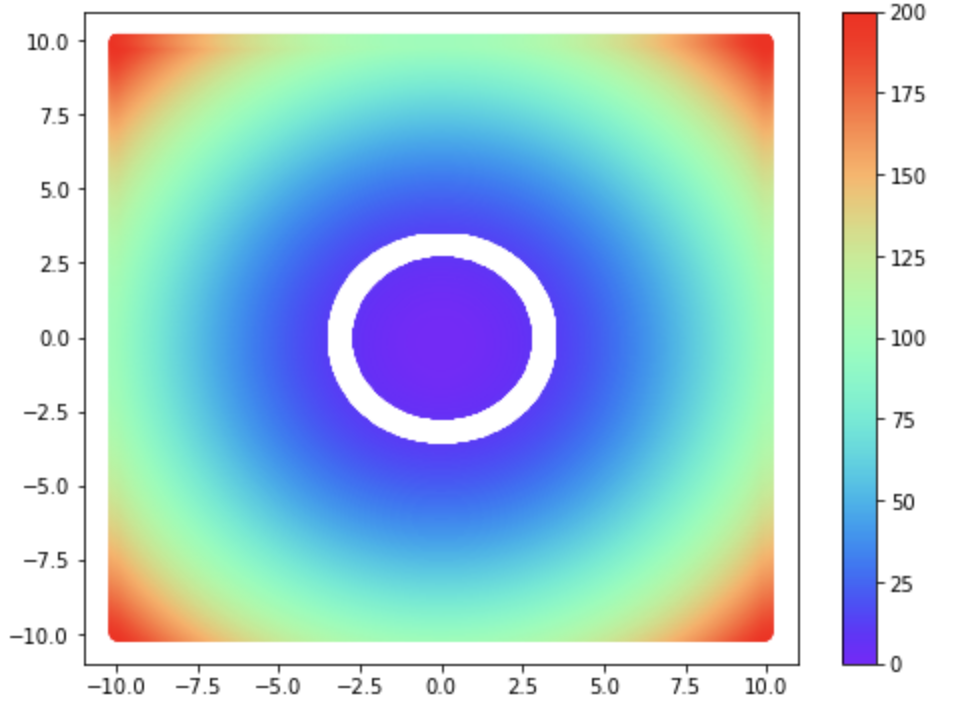
</div>

In [119]:
def f(x1, x2):
    return x1**2 + x2**2

def create_meshgrid(x1_lims, x2_lims):
    x1mesh, x2mesh = np.meshgrid(x1_lims, x2_lims)
    return np.c_[x1mesh.ravel(), x2mesh.ravel()]

In [120]:
x1_lims = np.arange(-10,10,0.02)
x2_lims = np.arange(-10,10,0.02)

print("tamanho dos vetores: x1 = {} e x2 = {}".format(len(x1_lims), len(x2_lims)))

# Crie a malha usando os vetores definidos acima:

mesh = create_meshgrid(x1_lims, x2_lims)

print("dimensoes do meshgrid: ", mesh.shape)

tamanho dos vetores: x1 = 1000 e x2 = 1000
dimensoes do meshgrid:  (1000000, 2)


In [121]:
L = [] #lista para salvar valores

x1_w=[] #x1 para circulo branco
x2_w=[] #x2 para circulo branco

for v in mesh:
    x1 = v[0]
    x2 = v[1]
    value_f = f(x1, x2)
    if 9<value_f<11:
        x1_w.append(x1)
        x2_w.append(x2)
    
    L.append(value_f)

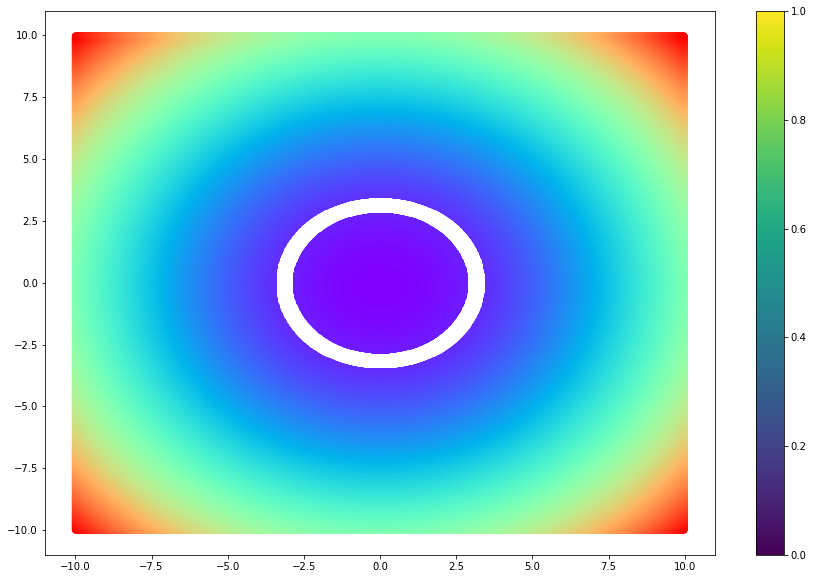

In [122]:
plt.figure(figsize=[15,10])
plt.scatter(mesh[:, 0], mesh[:, 1], c=L, cmap=plt.cm.rainbow)
plt.scatter(x1_w,x2_w, c='white')
plt.colorbar()
plt.show()

Ex3: Use o dataframe df, carregado abaixo, onde cada observação corresponde a uma reclamação feita pelo consumidor, para responder as perguntas abaixo:

1 - Qual o número de reclamações por Estado?
2 - Qual a quantidade de reclamações por sexo?
3 - O tempo de resposta tem alguma correlação com a nota do consumidor?
4 - Proporção de reclamações registradas e não respondidas.
5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las. Importante: É interessante que as análises contenham gráficos. No dia-a-dia de um cientista, grande parte do trabalho é analisar dados e gerar visualizações para apresentá-las.

In [97]:
import pandas as pd

df = pd.read_csv("dadosgovbr---2014.csv",sep = ';', encoding="latin-1")

df.head()

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Edição de Conteúdo,Interação do Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
2,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Volta Redonda,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
3,Instituto de Promoção e Defesa do Cidadão e Co...,Não identificado,NE,MA,São Luís,F,entre 31 a 40 anos,2014,5,29/05/2014,...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
4,Secretaria de Desenvolvimento Social e Direito...,Não identificado,NE,PE,Recife,M,entre 21 a 30 anos,2014,6,30/06/2014,...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1


In [115]:
#1 - Qual o número de reclamações por Estado?
df.UF.value_counts()

SP    11882
PR     6140
RJ     4907
MG     4186
BA     2443
RS     1941
DF     1805
PE     1626
SC     1458
MA     1082
ES     1081
CE     1068
MT     1012
GO      886
MS      531
AC      449
PB      343
AM      291
PA      211
RN      160
RO      119
AL      104
SE       97
PI       77
TO       46
RR       24
AP       18
Name: UF, dtype: int64

In [91]:
#2 - Qual a quantidade de reclamações por sexo?
df.Sexo.value_counts()

M    27895
F    16092
Name: Sexo, dtype: int64

In [93]:
#3 - O tempo de resposta tem alguma correlação com a nota do consumidor?
#Correlação Fraca
df.corr()[['Tempo Resposta']]

,Tempo Resposta
Ano Abertura,NaN
Mês Abertura,-0.035776
Prazo Analise Gestor,0.082552
Tempo Resposta,1.000000
Nota do Consumidor,-0.187150
Total,NaN


In [104]:
#4 - Proporção de reclamações registradas e não respondidas.
df.Respondida.value_counts()*100 /df.shape[0]

S    95.394094
N     4.605906
Name: Respondida, dtype: float64

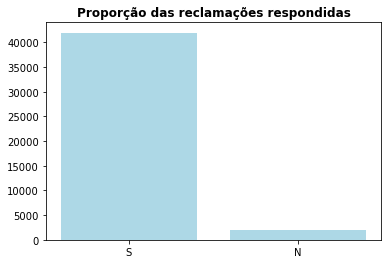

In [99]:
plt.bar(df.Respondida.unique(), df.Respondida.value_counts(), color="lightblue")
plt.title("Proporção das reclamações respondidas", {'fontsize': 12,'fontweight': 'bold'})
plt.show()

5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las. Importante: É interessante que as análises contenham gráficos. No dia-a-dia de um cientista, grande parte do trabalho é analisar dados e gerar visualizações para apresentá-las.

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43987 entries, 0 to 43986
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gestor                  43987 non-null  object 
 1   Canal de Origem         43987 non-null  object 
 2   Região                  43987 non-null  object 
 3   UF                      43987 non-null  object 
 4   Cidade                  43987 non-null  object 
 5   Sexo                    43987 non-null  object 
 6   Faixa Etária            43987 non-null  object 
 7   Ano Abertura            43987 non-null  int64  
 8   Mês Abertura            43987 non-null  int64  
 9   Data Abertura           43987 non-null  object 
 10  Hora Abertura           43987 non-null  object 
 11  Data Resposta           41961 non-null  object 
 12  Hora Resposta           41961 non-null  object 
 13  Data Análise            1953 non-null   object 
 14  Hora Análise            1953 non-null 

In [125]:
df.describe()

,Ano Abertura,Mês Abertura,Prazo Analise Gestor,Tempo Resposta,Nota do Consumidor,Total
count,43987.0,43987.000000,1953.000000,41961.000000,28627.000000,43987.0
mean,2014.0,9.550435,4.768049,6.667572,3.007021,1.0
std,0.0,1.898572,4.395177,3.066805,1.681700,0.0
min,2014.0,5.000000,0.000000,0.000000,1.000000,1.0
25%,2014.0,8.000000,1.000000,4.000000,1.000000,1.0
50%,2014.0,10.000000,4.000000,8.000000,3.000000,1.0
75%,2014.0,11.000000,8.000000,9.000000,5.000000,1.0
max,2014.0,12.000000,15.000000,13.000000,5.000000,1.0


In [127]:
df.head(3)

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Edição de Conteúdo,Interação do Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
2,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Volta Redonda,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1


### Utilizando o conjunto de dados, quais as regiões com o maior número de reclamações? E quais são as principais reclamações? 

In [135]:
dict_reg = {
       'MG':'SUDESTE','ES':'SUDESTE','SP':'SUDESTE','RJ':'SUDESTE',
       'PR':'SUL','RS':'SUL','SC':'SUL',
       'GO':'CENTRO_OESTE','MT':'CENTRO_OESTE','MS':'CENTRO_OESTE','DF':'CENTRO_OESTE',
       'PA':'NORTE','AM':'NORTE','AP':'NORTE','AC':'NORTE','RO':'NORTE','RR':'NORTE','TO':'NORTE',
       'AL':'NORDESTE','BA':'NORDESTE','MA':'NORDESTE','PI':'NORDESTE','PE':'NORDESTE','PB':'NORDESTE','RN':'NORDESTE','SE':'NORDESTE','CE':'NORDESTE'
}

In [148]:
dados = df[['UF','Problema','Grupo Problema']]
dados["Região"] = [dict_reg[y] for y in dados.UF]
dados.head()

C:\Users\gilma\AppData\Local\Temp\ipykernel_12432\724040513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Região"] = [dict_reg[y] for y in dados.UF]


,UF,Problema,Grupo Problema,Região
0,RJ,Cobrança de compra/saque não reconhecido,Cobrança / Contestação,SUDESTE
1,ES,Não entrega / demora na entrega do produto,Entrega do Produto,SUDESTE
2,RJ,Dificuldade / atraso na devolução de valores p...,Cobrança / Contestação,SUDESTE
3,MA,"Dados pessoais ou financeiros consultados, col...",Informação,NORDESTE
4,PE,Cobrança por serviço/produto não contratado / ...,Cobrança / Contestação,NORDESTE


                 UF  Problema  Grupo Problema
Região                                       
SUDESTE       22056     22056           22056
SUL            9539      9539            9539
NORDESTE       7000      7000            7000
CENTRO_OESTE   4234      4234            4234
NORTE          1158      1158            1158


<AxesSubplot:xlabel='Região'>

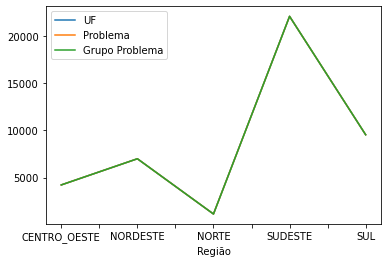

In [149]:
print(dados.groupby('Região').count().sort_values(by='UF', ascending = False))
dados.groupby('Região').count().plot()

In [150]:
dados.groupby('Grupo Problema').sum('Grupo Problema').head()

""
Grupo Problema
Atendimento / SAC
Cobrança / Contestação
Contrato / Oferta
Entrega do Produto
Informação


In [151]:
dados.groupby('Problema').sum('Problema').head()

""
Problema
Adaptação de plano não efetivada
Alteração / rescisão de contrato sem solicitação / aviso prévio
Alteração da apólice sem solicitação / aviso prévio
"Alteração de odor, sabor, aspecto ou composição química"
Alteração de plano/contrato sem solicitação ou aviso prévio


- A região Sudeste teve o maior número de reclamações
- Entre os principais grupos de problemas estão o Atendimento/ SAC, e a Cobrança / Contestação.
- E se for listado dentre os principais motivos estão relacionados com Contestação, Atendimento.

### Pegando o exemplo da pergunta anterior o que fazer para sanar o problema?

In [152]:
df.head().T

,0,1,2,3,4
Gestor,Secretaria Nacional do Consumidor,Instituto Estadual de Proteção e Defesa do Con...,Secretaria Nacional do Consumidor,Instituto de Promoção e Defesa do Cidadão e Co...,Secretaria de Desenvolvimento Social e Direito...
Canal de Origem,Não identificado,Não identificado,Não identificado,Não identificado,Não identificado
Região,SE,SE,SE,NE,NE
UF,RJ,ES,RJ,MA,PE
Cidade,Itaboraí,Serra,Volta Redonda,São Luís,Recife
Sexo,M,F,M,F,M
Faixa Etária,entre 31 a 40 anos,entre 31 a 40 anos,entre 31 a 40 anos,entre 31 a 40 anos,entre 21 a 30 anos
Ano Abertura,2014,2014,2014,2014,2014
Mês Abertura,6,6,6,5,6
Data Abertura,27/06/2014,11/06/2014,27/06/2014,29/05/2014,30/06/2014


### Qual são os principais problemas nas reclamações?

In [181]:
print("""Observamos que a maioria das reclamações não obteve a participação do gestor, demonstrando que pode 
ser um ponto a ser desenvolvido e melhor explorado futuramente.""")
df['Interação do Gestor'].value_counts()

Observamos que a maioria das reclamações não obteve a participação do gestor, demonstrando que pode 
ser um ponto a ser desenvolvido e melhor explorado futuramente.


N    42770
S     1217
Name: Interação do Gestor, dtype: int64

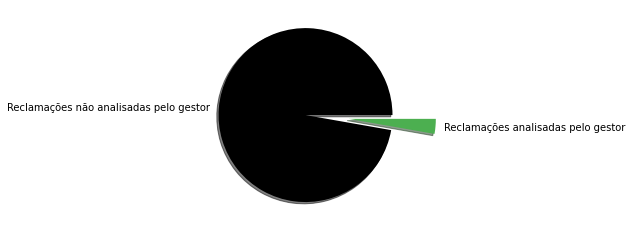

In [182]:
info1 = (df['Interação do Gestor'].value_counts())
x = (info1)
mylabels = ['Reclamações não analisadas pelo gestor', 'Reclamações analisadas pelo gestor']
mycolors = ["black", "#4CAF50"]
myexplode = (0,0.5)

plt.pie(x, labels = mylabels, colors = mycolors,explode = myexplode, shadow=True)
plt.show() 

In [183]:
tbl_proporção = pd.DataFrame(df['Interação do Gestor'].value_counts())
tbl_proporção.rename(columns = {'Interação do Gestor':'freq_abs'}, inplace = True)
tbl_proporção['freq_relativa'] = round(tbl_proporção.freq_abs /tbl_proporção.freq_abs.sum(),2)

In [184]:
print(tbl_proporção)
print("95% das reclamações não obteve a participação do Gestor")

   freq_abs  freq_relativa
N     42770           0.97
S      1217           0.03
95% das reclamações não obteve a participação do Gestor


In [202]:
print("""Outro problema analisado é que muitas reclamações não foram analisadas.""")
n_faltantes = df['Data Análise'].isna().sum()
print('Reclamações não analisadas:',n_faltantes)

Outro problema analisado é que muitas reclamações não foram analisadas.
Reclamações não analisadas: 42034


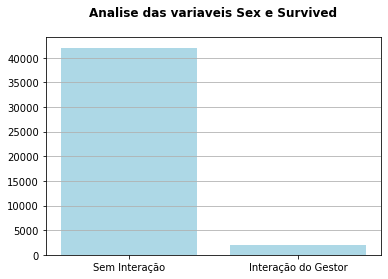

In [204]:
interação = df['Data Análise'].count()

info1 = (n_faltantes,interação)
x = ['Sem Interação','Interação do Gestor']
y = (info1)

plt.bar(x,y, color = 'lightblue')
plt.title('Analise das variaveis Sex e Survived\n', {'fontsize': 12,'fontweight': 'bold'})
plt.grid(axis = 'y')
plt.show()

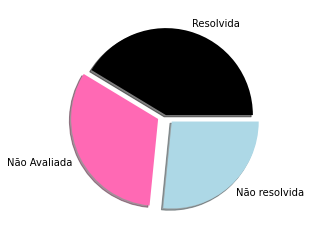

In [205]:
info = df['Avaliação Reclamação'].value_counts()
df['Total'].value_counts()

info1 = (df['Avaliação Reclamação'].value_counts())
x = (info1)
mylabels = ['Resolvida', 'Não Avaliada', 'Não resolvida']
mycolors = ["black", "hotpink", "lightblue"]
myexplode = (0,0.1,0.1)

plt.pie(x, labels = mylabels, colors = mycolors,explode = myexplode, shadow=True)
plt.show() 

- Conforme analisado, vimos que os principais problemas são a falta de interação do gestor que resulta em mais de 95% dos casos apresentados, outro ponto observado é que as datas de analises estão com bastante informaçõ,es faltantes, que impossibilita uma melhor analise nesse conteudo, e por ultimo observamos que muitas reclamações não foram analisadas e muitas não foram resolvidas.

- Possíveis Soluções:

    - Maior interação dos gestores nas reclamações, ou que seja feito uma triagem das reclamações principalmente nas reclamações que não foram solucionadas conforme vimos nos graficos acima.
 
    - Realizar sempre o feedback(retorno) das reclamações, foi observado que muitas informações estão nulas, e outras não foram respondidas. 

    - Sempre manter as bases de dados preenchidas e atualizadas, para uma analise mais acertiva.
    - Se atentar sobre as questões de atendimento, e pegar as informações coletadas e realizar medidas preventivas e corretivas.